In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

sys.path.append(os.path.join(os.getcwd(), '../symlie'))
sys.path.append(os.path.join(os.getcwd(), '..'))
from symlie.misc.viz import plot2d

from symlie.misc.utils_results import pivot, assert_columns_same, get_and_check_Ps, stringify_dict, aggregate_dataset, plot_best, return_table, plot_pivot
from symlie.misc.wandb import update_results_df, get_inspect_df, get_inspectdev_df
from symlie.model.setup import load_P_pred

In [2]:
df = get_inspectdev_df(tags = ['noise1d-loss'])

lw_o, lw_dg = 'lossweight_o', 'lossweight_dg'

Retreiving wandb 7phuii6f: 100%|██████████| 48/48 [00:41<00:00,  1.16it/s]


In [10]:
losses = ['test_loss', 'test_loss_o', 'test_loss_dg']
d = df[[lw_o, lw_dg] + losses + ['lr']].copy()

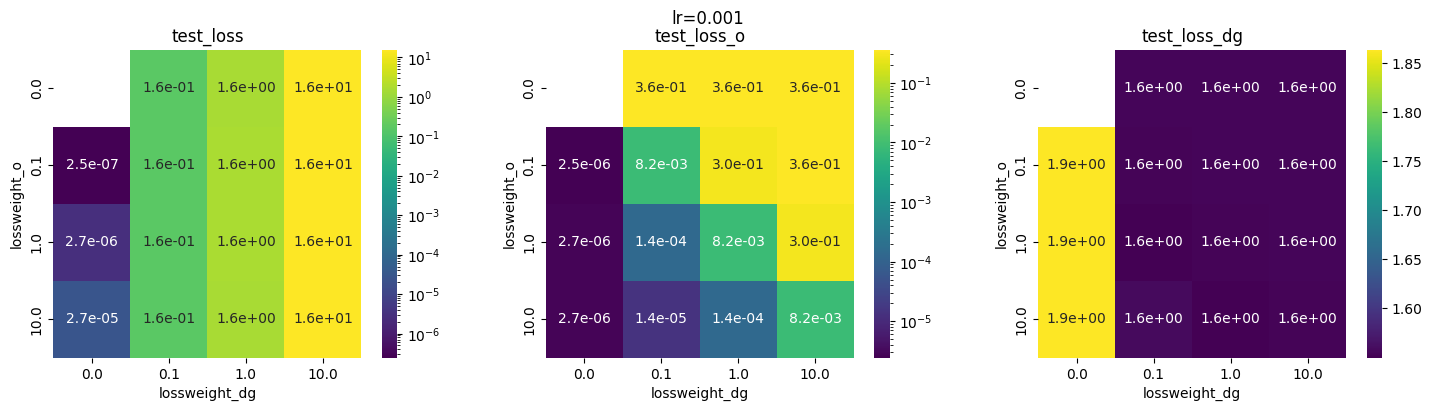

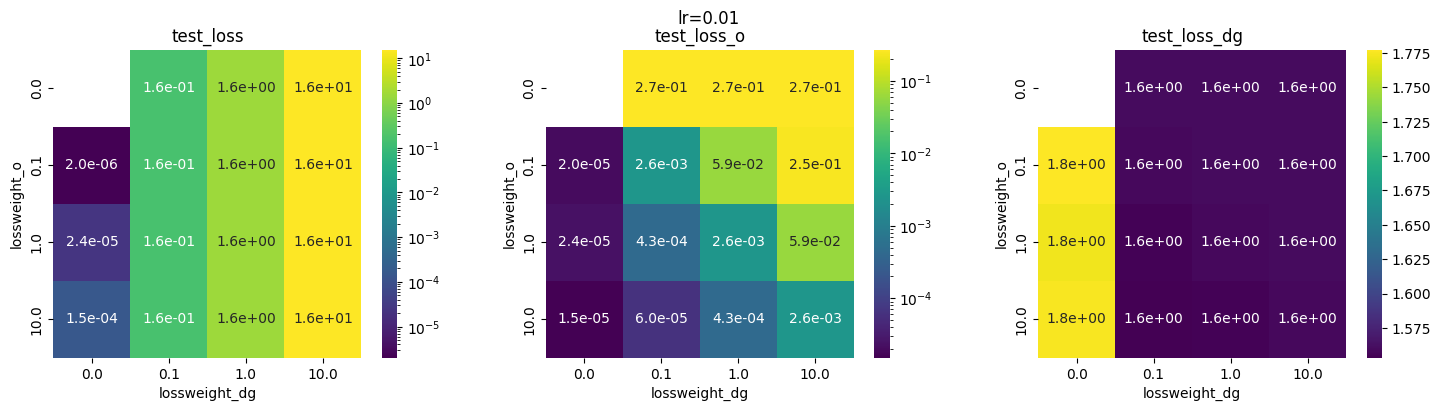

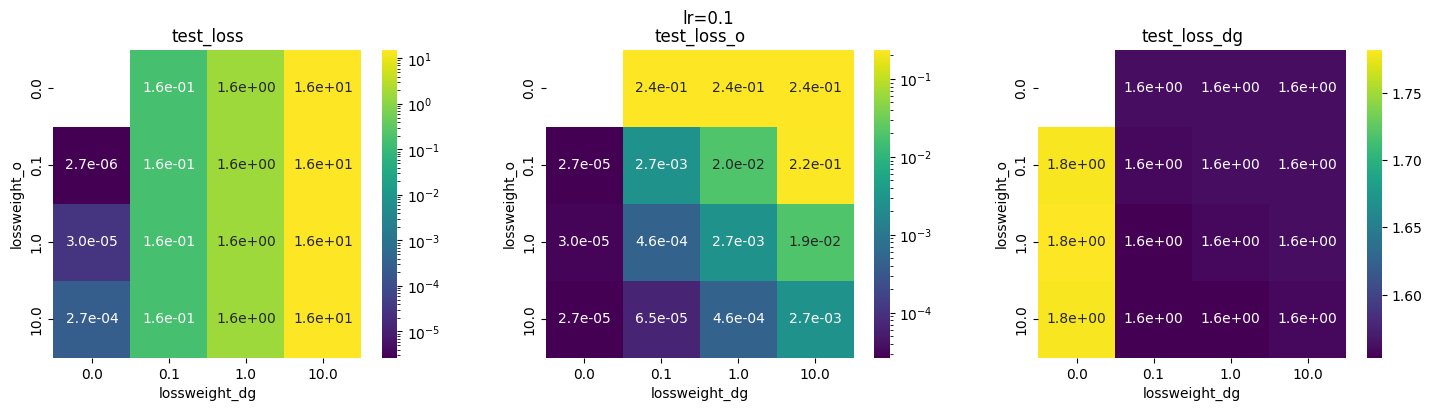

In [20]:
for lr, d_lr in d.groupby('lr'):

    d_lr = d_lr.set_index([lw_o, lw_dg])
    d_lr = d_lr.drop([(0, 0)])

    d_lr.reorder_levels([lw_o, lw_dg]).sort_index()

    d_pivots = {loss: d_lr.pivot_table(index=[lw_o], columns=[lw_dg], values=loss, aggfunc='mean') for loss in losses}

    n_plots = len(d_pivots)

    fig, axs = plt.subplots(1, n_plots, figsize=(6*n_plots, 4))
    for i, (loss, d_pivot) in enumerate(d_pivots.items()):
        # plot_pivot(d_pivot, ax=ax[i], title=loss)
        ax = axs[i]

        norm = LogNorm() if loss != 'test_loss_dg' else None
        sns.heatmap(d_pivot, annot=True, fmt=".1e", cmap='viridis', ax = ax, square=True, norm=norm)
        ax.set_title(loss)
    fig.suptitle(f'lr={lr}')
    plt.show()